In [120]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
#Leer archivos csv 
mindFactory_update=pd.read_csv("mindfactory_updated.csv")
mindFactory_done=pd.read_csv("mindfactory_done.csv")

In [8]:
#Muestra los cinco primeros registros
mindFactory_update.head(5)

,name,price_eur,display_inch,display_cm,display_resolution,display_ratio,weight_kg,height_mm,width_mm,depth_mm,...,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth,bluetooth_version,wifi_standard,product_ean,product_sku,release_year,category
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,2560x1600,16:9,1.29,16.1,304.1,212.4,...,True,False,True,True,5.0,Wi-Fi 6 (802.11ax),1.942521e+11,MGN63D/A,2020.0,Notebooks
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,3840x2160,16:9,2.80,20.1,397.6,283.5,...,True,True,True,True,5.3,Wi-Fi 6E (802.11ax),4.711377e+12,0017P2-013,NaN,Notebooks
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,2880x1800,NaN,1.60,17.9,314.0,227.5,...,True,False,True,True,5.2,Wi-Fi 6E (802.11ax),4.719073e+12,0014F1-049,NaN,Notebooks
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,NaN,NaN,4.719332e+12,AORUS 15 9KF-E3DE383SH,NaN,Notebooks
4,Fujitsu Lifebook A3511 FHD i3-1115G4 8GB 256GB...,354.97,15.6,39.6,1920x1080,NaN,1.95,23.9,361.0,244.0,...,False,True,True,True,5.1,Wi-Fi 6E (802.11ax),4.065221e+12,FPC04902BS,NaN,Notebooks


In [12]:
#Resumen del conjunto de datos 
mindFactory_update.describe()

,price_eur,display_inch,display_cm,weight_kg,height_mm,width_mm,depth_mm,ram_memory,internal_storage_gb,battery_life_h,battery_capacity_wh,psu_watts,speakers_count,product_ean,release_year
count,764.000000,763.000000,628.000000,616.000000,627.000000,627.000000,627.000000,627.000000,618.000000,210.000000,580.000000,576.000000,538.000000,6.980000e+02,126.000000
mean,1736.678416,14.421232,37.355255,1.618625,21.511053,335.288357,228.200797,20.803828,395.813916,12.749000,60.913534,88.184028,2.503717,2.619275e+12,2022.039683
std,998.432706,2.102272,3.044616,0.467579,33.334493,27.438917,36.440450,79.892368,365.275806,4.517691,14.773935,57.931361,1.036119,2.476135e+12,0.773571
min,276.800000,0.000000,25.600000,0.400000,1.490000,278.200000,4.600000,4.000000,1.000000,4.000000,36.000000,30.000000,1.000000,1.942521e+11,2020.000000
25%,1037.910000,14.000000,35.600000,1.300000,14.700000,312.000000,217.000000,8.000000,128.000000,9.500000,52.500000,65.000000,2.000000,1.968040e+11,2022.000000
50%,1530.730000,14.000000,35.600000,1.520000,17.900000,325.400000,226.900000,16.000000,512.000000,12.000000,57.000000,65.000000,2.000000,4.039407e+12,2022.000000
75%,2105.340000,15.600000,39.600000,1.802500,19.900000,359.000000,245.250000,16.000000,512.000000,17.000000,65.000000,67.000000,2.000000,4.711122e+12,2022.000000
max,6130.110000,17.300000,43.900000,5.200000,272.000000,410.000000,330.000000,2000.000000,2000.000000,22.000000,100.000000,330.000000,6.000000,8.806095e+12,2023.000000


In [88]:
notebook_webcam=mindFactory_update.groupby(['has_webcam'], axis=0).mean('price_eur')['price_eur'].reset_index()

notebook_webcam.loc[0,'has_webcam']='Notebook sin webcam'
notebook_webcam.loc[1,'has_webcam']='Notebook con webcam'
notebook_webcam.loc[:,'price_eur']=notebook_webcam['price_eur'].round(decimals=1)

,has_webcam,price_eur
0,Notebook sin webcam,1796.2
1,Notebook con webcam,1721.4


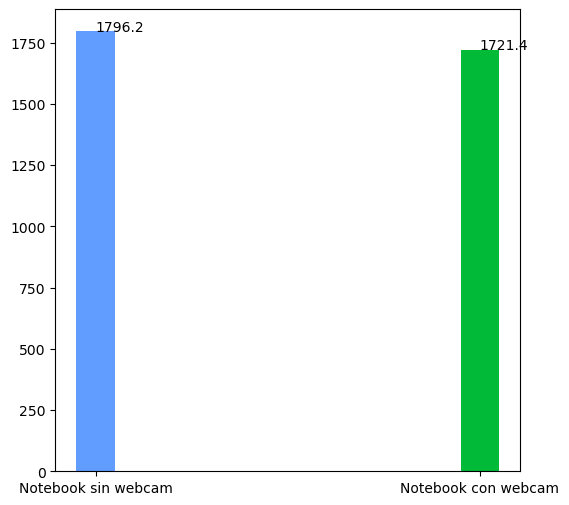

0    1796.2
1    1721.4
Name: price_eur, dtype: float64

In [90]:
#Diagrama de Barra 
fig,ax=plt.subplots(figsize=(6,6))
etiquetas=notebook_webcam.loc[:,'has_webcam']
colores = ["#619cff", "#00ba38"]
ax.bar(notebook_webcam['has_webcam'], notebook_webcam['price_eur'], tick_label=etiquetas, width=[0.1,0.1], color=colores)
co=np.arange(len(notebook_webcam['price_eur']))
price_eur=notebook_webcam['price_eur']
for i,j in zip(co,price_eur): 
    ax.annotate(j,xy=(i,j+0.5))
plt.show()
price_eur

In [119]:
list_name=mindFactory_update['name'].str.split(" ")
mindFactory_update['Modelo']=[x[0] for x in list_name]

data_model=mindFactory_update.groupby(['Modelo']).mean('price_eur').sort_values(by='price_eur',ascending=False)['price_eur'].reset_index()
data_model

,Modelo,price_eur
0,GETAC,4010.705000
1,Corsair,3746.990000
2,SAMSUNG,3641.790000
3,Panasonic,3489.810000
4,FUJITSU,3334.478571
5,MSI,3023.030851
6,PANASONIC,2676.857273
7,Apple,2335.376800
8,Gigabyte,2021.776667
9,APPLE,1984.685625


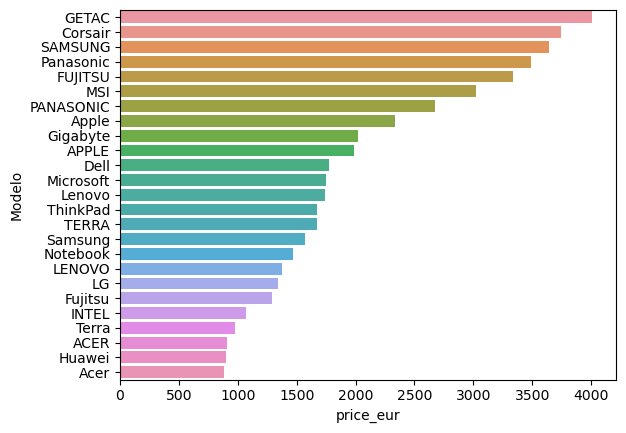

In [122]:
sns.barplot(data=data_model, y=data_model['Modelo'],x=data_model['price_eur'], orient='horizontal' )
plt.show()